### BASICS OF NETWORKX

In [3]:
import psycopg2
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

conn = psycopg2.connect(database="postgres", user="postgres", password="***", host="127.0.0.1", port="5432")

In [5]:
query = """SELECT fromnode, tonode, distance from edges"""
df = pd.read_sql_query(query, conn)
df.shape

(10, 3)

In [11]:
# from dataframe to graph
# import as undirected graph
g=nx.from_pandas_dataframe(df, 'fromnode', 'tonode', 'distance')

In [12]:
# from graph to dataframe as a matrix
nx.to_pandas_dataframe(g, weight='distance')

,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1.0,0.0,1306.0,0.0,0.0,2161.0,2661.0,0.0
2.0,1306.0,0.0,919.0,629.0,0.0,0.0,0.0
3.0,0.0,919.0,0.0,435.0,1225.0,0.0,1983.0
4.0,0.0,629.0,435.0,0.0,0.0,0.0,0.0
5.0,2161.0,0.0,1225.0,0.0,0.0,1483.0,1258.0
6.0,2661.0,0.0,0.0,0.0,1483.0,0.0,0.0
7.0,0.0,0.0,1983.0,0.0,1258.0,0.0,0.0


In [13]:
# print nodes and edges
print 'list nodes: ', g.nodes(), '\n'
print 'no. nodes:', len(g) #no. nodes
print 'no. edges:', g.number_of_edges(), '\n'
print 'list edges: ', g.edges(), '\n'
print 'list all edge attributes: ', dict(((a,b,),c['distance']) for a,b,c in g.edges(data=True))

list nodes:  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0] 

no. nodes: 7
no. edges: 10 

list edges:  [(1.0, 2.0), (1.0, 5.0), (1.0, 6.0), (2.0, 3.0), (2.0, 4.0), (3.0, 4.0), (3.0, 5.0), (3.0, 7.0), (5.0, 6.0), (5.0, 7.0)] 

list all edge attributes:  {(1.0, 2.0): 1306.0, (5.0, 6.0): 1483.0, (5.0, 7.0): 1258.0, (1.0, 5.0): 2161.0, (1.0, 6.0): 2661.0, (3.0, 7.0): 1983.0, (2.0, 3.0): 919.0, (3.0, 4.0): 435.0, (2.0, 4.0): 629.0, (3.0, 5.0): 1225.0}


### PLOT GRAPH
#### NOTE TYPE OF LAYOUTS
'circular_layout',
'random_layout',
'shell_layout',
'spring_layout',
'spectral_layout',
'fruchterman_reingold_layout'

{(1.0, 2.0): <matplotlib.text.Text at 0x11ae0e490>,
 (1.0, 5.0): <matplotlib.text.Text at 0x11ae32250>,
 (1.0, 6.0): <matplotlib.text.Text at 0x11ae32810>,
 (2.0, 3.0): <matplotlib.text.Text at 0x11ae3e3d0>,
 (2.0, 4.0): <matplotlib.text.Text at 0x11ae3ef50>,
 (3.0, 4.0): <matplotlib.text.Text at 0x11ae3e990>,
 (3.0, 5.0): <matplotlib.text.Text at 0x11ae4a550>,
 (3.0, 7.0): <matplotlib.text.Text at 0x11ae32dd0>,
 (5.0, 6.0): <matplotlib.text.Text at 0x11ae26690>,
 (5.0, 7.0): <matplotlib.text.Text at 0x11ae26c50>}

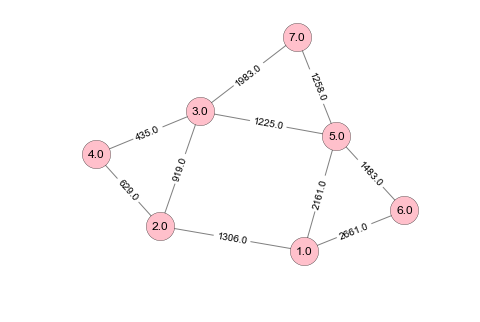

In [14]:
# choose layout
pos = nx.fruchterman_reingold_layout(g)

# draw network
nx.draw(g, pos, with_labels = True, node_size=800, node_color='pink', edge_color='grey')

# label edges
edge_labels = dict([((u,v,),d['distance']) for u,v,d in g.edges(data=True)])
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

### PLOT GRAPH WITH SHORTEST PATH

[2, 3.0, 7.0]


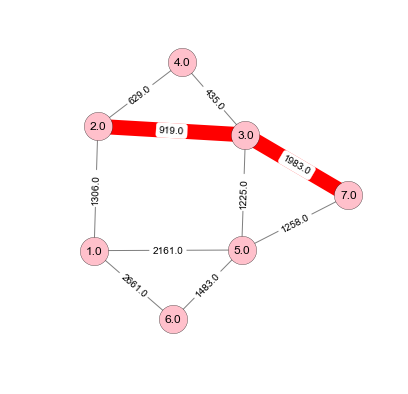

In [35]:
s=2
t=7

print nx.shortest_path(g, source=s,target=t, weight='distance')

plt.figure(figsize=(5, 5))
# choose layout
pos = nx.fruchterman_reingold_layout(g)

# draw network
nx.draw(g, pos, with_labels = True, node_size=800, node_color='pink', edge_color='grey')
# nx.draw_networkx_edges(g, pos, edge_color='grey',width=0.1, alpha=0.5)

# label edges
edge_labels = dict([((u,v,),d['distance']) for u,v,d in g.edges(data=True)])
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)


# plot longest path
path = nx.shortest_path(g, source=s,target=t, weight='distance')
path_edges = zip(path,path[1:])
# nx.draw_networkx_nodes(g,pos,nodelist=path,node_color='black', node_size=1000)
nx.draw_networkx_edges(g,pos,edgelist=path_edges,edge_color='r',width=15)

### SHORTEST PATHS

In [31]:
# shortest path
nx.shortest_path(graph, source=1, target=3, weight='distance')

[1, 2.0, 3.0]

In [32]:
# shortest path
paths = nx.all_shortest_paths(graph, source=1, target=7, weight='distance')
for path in paths:
    print path

[1, 5.0, 7]


In [33]:
# all simple paths without weight
path = nx.all_simple_paths(graph, source=1, target=7)
for i in path:
    print i

[1, 2.0, 3.0, 5.0, 7]
[1, 2.0, 3.0, 7]
[1, 2.0, 4.0, 3.0, 5.0, 7]
[1, 2.0, 4.0, 3.0, 7]
[1, 5.0, 3.0, 7]
[1, 5.0, 7]
[1, 6.0, 5.0, 3.0, 7]
[1, 6.0, 5.0, 7]
